In [3]:
!pip install cltk

Defaulting to user installation because normal site-packages is not writeable


In [20]:
from cltk.data.fetch import FetchCorpus
corpus_downloader = FetchCorpus(language="grc")
corpus_downloader.list_corpora
corpus_downloader.import_corpus("grc_text_tesserae")

In [23]:
import os

directory = "cltk_data/grc/text/grc_text_tesserae/texts"  

output_file = "cltk_data/grc/text/grc_text_tesserae/texts/combined_iliad" 

with open(output_file, 'w', encoding='utf-8') as outfile:
    # Loop through each part of the Odyssey (assuming parts are numbered 1 through 24)
    for i in range(1, 25):
        file_name = f"homer.iliad.part.{i}.tess"
        file_path = os.path.join(directory, file_name)

        # Check if the file exists before attempting to open it
        if os.path.exists(file_path):
            with open(file_path, 'r', encoding='utf-8') as infile:
                # Write the content of the current file to the output file
                outfile.write(infile.read() + "\n")
        else:
            print(f"File {file_name} does not exist.")


In [16]:
import string
import re 
from cltk.alphabet.grc.grc import normalize_grc

with open('combined_odyssey.tess', 'r', encoding='utf-8') as file:
    odyssey_lines = file.readlines()

with open('combined_iliad.tess', 'r', encoding='utf-8') as file:
    iliad_lines = file.readlines()

with open("cltk_data/grc/text/grc_text_tesserae/texts/euripides.medea.tess", 'r', encoding='utf-8') as file:
    euripides_medea_lines = file.readlines()

with open("cltk_data/grc/text/grc_text_tesserae/texts/euripides.alcestis.tess", 'r', encoding='utf-8') as file:
    euripides_alcestis_lines = file.readlines()

with open("cltk_data/grc/text/grc_text_tesserae/texts/euripides.bacchae.tess", 'r', encoding='utf-8') as file:
    euripides_bacchae_lines = file.readlines()

with open("cltk_data/grc/text/grc_text_tesserae/texts/euripides.ion.tess", 'r', encoding='utf-8') as file:
    euripides_ion_lines = file.readlines()

with open("cltk_data/grc/text/grc_text_tesserae/texts/euripides.trojan_women.tess", 'r', encoding='utf-8') as file:
    euripides_trojan_lines = file.readlines()

with open("cltk_data/grc/text/grc_text_tesserae/texts/euripides.andromache.tess", 'r', encoding='utf-8') as file:
    euripides_andromache_lines = file.readlines()

with open("cltk_data/grc/text/grc_text_tesserae/texts/euripides.suppliants.tess", 'r', encoding='utf-8') as file:
    euripides_suppliants_lines = file.readlines()

with open("cltk_data/grc/text/grc_text_tesserae/texts/euripides.heracles.tess", 'r', encoding='utf-8') as file:
    euripides_heracles_lines = file.readlines()
    
with open("cltk_data/grc/text/grc_text_tesserae/texts/euripides.rhesus.tess", 'r', encoding='utf-8') as file:
    euripides_rhesus_lines = file.readlines()
    
with open("cltk_data/grc/text/grc_text_tesserae/texts/sophocles.antigone.tess", 'r', encoding='utf-8') as file:
    sophocles_antigone_lines = file.readlines()

with open("cltk_data/grc/text/grc_text_tesserae/texts/sophocles.oedipus_at_colonus.tess", 'r', encoding='utf-8') as file:
    sophocles_oedipus_lines = file.readlines()

with open("cltk_data/grc/text/grc_text_tesserae/texts/sophocles.philoctetes.tess", 'r', encoding='utf-8') as file:
    sophocles_philoctetes_lines = file.readlines()
    
with open("cltk_data/grc/text/grc_text_tesserae/texts/sophocles.oedipus_tyrannus.tess", 'r', encoding='utf-8') as file:
    sophocles_tyrannus_lines = file.readlines()
    
with open("cltk_data/grc/text/grc_text_tesserae/texts/sophocles.electra.tess", 'r', encoding='utf-8') as file:
    sophocles_electra_lines = file.readlines()

with open("cltk_data/grc/text/grc_text_tesserae/texts/hesiod.works_and_days.tess", 'r', encoding='utf-8') as file:
    hesiod_works_lines = file.readlines()

import re
import string
import cltk

def process_tess(lines, isHomer = False):
    cleaned_lines = []
    line_number_pattern = r"<.*?>"
    tab_pattern = r"\t"  
    
    for line in lines:
        original_line = line.strip()

        if not original_line:
            continue
            
        line_number = None
        # Extract line number if present (e.g., <hom. il. 1.13>)
        if isHomer:
            line_number_match = re.match(r"<.*?(\d+\.\d+)>", original_line)
            if line_number_match:
                number_str = line_number_match.group(1)
                integer_part, fractional_part = number_str.split('.')
                line_number = (int(integer_part), int(fractional_part))
        else: 
            line_number_match = re.match(r"<.*?(\d+)>", original_line)
            if line_number_match: 
                line_number = int(line_number_match.group(1))
        
        
        
        
        # Remove the line number and tabs
        line = re.sub(line_number_pattern, "", original_line)
        line = re.sub(tab_pattern, "", line)
        
        # Clean punctuation and normalize 
        line = re.sub(r'\b[A-ZΑ-Ω][\wΆ-Ͽ]*\b', '', line)
        line = line.translate(str.maketrans('', '', string.punctuation))
        line = cltk.alphabet.grc.grc.normalize_grc(line)
        line = re.sub(r'\s+', '', line)
        line = re.sub(r'·', '', line)
        
        # Store line and line number as tuple
        cleaned_lines.append([line, line_number])
            
    return cleaned_lines


processed_odyssey_lines = process_tess(odyssey_lines, True)
processed_iliad_lines = process_tess(iliad_lines, True)

processed_euripides_medea_lines = process_tess(euripides_medea_lines)
processed_euripides_alcestis_lines = process_tess(euripides_alcestis_lines)
processed_euripides_bacchae_lines = process_tess(euripides_bacchae_lines)
processed_euripides_ion_lines = process_tess(euripides_ion_lines)
processed_euripides_trojan_lines = process_tess(euripides_trojan_lines)
processed_euripides_rhesus_lines = process_tess(euripides_rhesus_lines)
processed_euripides_andromache_lines = process_tess(euripides_andromache_lines)
processed_euripides_suppliants_lines = process_tess(euripides_suppliants_lines)
processed_euripides_heracles_lines = process_tess(euripides_heracles_lines)

processed_sophocles_antigone_lines = process_tess(sophocles_antigone_lines)
processed_sophocles_philoctetes_lines = process_tess(sophocles_philoctetes_lines)
processed_sophocles_oedipus_lines = process_tess(sophocles_oedipus_lines)
processed_sophocles_tyrannus_lines = process_tess(sophocles_oedipus_lines)
processed_sophocles_electra_lines = process_tess(sophocles_electra_lines)

processed_hesiod_works_lines = process_tess(hesiod_works_lines)


# print(processed_odyssey_lines[:50])
# print(processed_hesiod_works_lines[:10])
# print(processed_sophocles_antigone_lines[:10])



[['ἄνδραμοιἔννεπεμοῦσαπολύτροπονὃςμάλαπολλὰ', (1, 1)], ['πλάγχθηἐπεὶ́ηςἱερὸνπτολίεθρονἔπερσεν', (1, 2)], ['πολλῶνδἀνθρώπωνἴδενἄστεακαὶνόονἔγνω', (1, 3)], ['πολλὰδὅγἐνπόντῳπάθενἄλγεαὃνκατὰθυμόν', (1, 4)], ['ἀρνύμενοςἥντεψυχὴνκαὶνόστονἑταίρων', (1, 5)], ['ἀλλοὐδὣςἑτάρουςἐρρύσατοἱέμενόςπερ', (1, 6)], ['αὐτῶνγὰρσφετέρῃσινἀτασθαλίῃσινὄλοντο', (1, 7)], ['νήπιοιοἳκατὰβοῦς̔́ονος̓́οιο', (1, 8)], ['ἤσθιοναὐτὰρὁτοῖσινἀφείλετονόστιμονἦμαρ', (1, 9)], ['τῶνἁμόθενγεθεάθύγατερ́ςεἰπὲκαὶἡμῖν', (1, 10)], ['ἔνθἄλλοιμὲνπάντεςὅσοιφύγοναἰπὺνὄλεθρον', (1, 11)], ['οἴκοιἔσανπόλεμόντεπεφευγότεςἠδὲθάλασσαν', (1, 12)], ['τὸνδοἶοννόστουκεχρημένονἠδὲγυναικὸς', (1, 13)], ['νύμφηπότνιἔρυκὲδῖαθεάων', (1, 14)], ['ἐνσπέσσιγλαφυροῖσιλιλαιομένηπόσινεἶναι', (1, 15)], ['ἀλλὅτεδὴἔτοςἦλθεπεριπλομένωνἐνιαυτῶν', (1, 16)], ['τῷοἱἐπεκλώσαντοθεοὶοἶκόνδενέεσθαι', (1, 17)], ['εἰς̓́κηνοὐδἔνθαπεφυγμένοςἦενἀέθλων', (1, 18)], ['καὶμετὰοἷσιφίλοισιθεοὶδἐλέαιρονἅπαντες', (1, 19)], ['νόσφίωνοςὁδἀσπερχὲςμενέαινεν', (1, 20)], ['ἀντιθέᾦιπάροςἣν

In [17]:
def create_chunks(lines, window_size, step_size, label):
    chunks = []
    chunks_text = []
    for i in range(0, len(lines) - window_size + 1, step_size):
        chunk_lines = lines[i:i + window_size]
        chunk = " ".join(line[0] for line in chunk_lines)  # Concatenate text
        chunk = re.sub(r'\s+', '', chunk)  # Clean up extra spaces
        num_beg = chunk_lines[0][1]  # First line number tuple
        num_end = chunk_lines[-1][1]  # Last line number tuple
        
        chunks.append({
            'chunk': chunk,
            'label': label,  # "odyssey" or "iliad"
            'num_beg': num_beg,
            'num_end': num_end
        })
        chunks_text.append(chunk)
    return chunks, chunks_text

chonk_odyssey, chonk_o = create_chunks(processed_odyssey_lines, window_size=100, step_size=100, label="odyssey")
chonk_iliad, ci = create_chunks(processed_iliad_lines, window_size=100, step_size=100, label="iliad")
all_chunks = chonk_iliad  + chonk_odyssey
print(len(all_chunks))
# print(chonk_odyssey[0])

chonk_medea, cem = create_chunks(processed_euripides_medea_lines, window_size=100, step_size=100, label="medea")
chonk_alcestis, cea = create_chunks(processed_euripides_alcestis_lines, window_size=100, step_size=100, label="alcestis")
chonk_antigone, csa = create_chunks(processed_sophocles_antigone_lines, window_size=100, step_size=100, label="antigone")
chonk_philoctetes, csp = create_chunks(processed_sophocles_philoctetes_lines, window_size=100, step_size=100, label="philoctetes")
chonk_works, chw = create_chunks(processed_hesiod_works_lines, window_size=100, step_size=100, label="works")
chonk_oedipus, cso = create_chunks(processed_sophocles_oedipus_lines, window_size=100, step_size=100, label="oedipus at colonus")
chonk_bacchae, ceb = create_chunks(processed_euripides_bacchae_lines, window_size=100, step_size=100, label="bacchae")
chonk_ion, cei = create_chunks(processed_euripides_ion_lines, window_size=100, step_size=100, label="ion")
chonk_trojan, cet = create_chunks(processed_euripides_trojan_lines, window_size=100, step_size=100, label="trojan women")
chonk_rhesus, cet = create_chunks(processed_euripides_rhesus_lines, window_size=100, step_size=100, label="rhesus")
chonk_tyrannus, cst = create_chunks(processed_sophocles_tyrannus_lines, window_size=100, step_size=100, label="oedipus tyrannus")
chonk_electra, cse = create_chunks(processed_sophocles_electra_lines, window_size=100, step_size=100, label="electra")
chonk_andromache, cea = create_chunks(processed_euripides_andromache_lines, window_size=100, step_size=100, label="andromache")
chonk_suppliants, ces = create_chunks(processed_euripides_suppliants_lines, window_size=100, step_size=100, label="suppliants")

chonk_heracles, ceh = create_chunks(processed_euripides_heracles_lines, window_size=100, step_size=100, label="heracles")



all_chunks_2 = chonk_medea + chonk_alcestis + chonk_bacchae + chonk_ion + chonk_trojan + chonk_andromache + chonk_suppliants + chonk_heracles
all_chunks_2 = all_chunks_2 + chonk_rhesus

all_chunks_3 = chonk_alcestis + chonk_medea
# all_chunks_2 = all_chunks_2 + chonk_antigone + chonk_philoctetes + chonk_oedipus + chonk_electra + chonk_tyrannus 
# print(all_chunks_2[1])

277


In [18]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np 
def get_top_trigrams(chunks):
    #vectorizer = CountVectorizer(analyzer='char', ngram_range=(3, 3), max_f)
    vectorizer = TfidfVectorizer(
        analyzer='char', 
        ngram_range=(3,3), 
        
        
        #max_df=0.7,
        #min_df=5
        )
    X = vectorizer.fit_transform(chunks)
    return X, vectorizer.get_feature_names_out()

chunks = [c['chunk'] for c in all_chunks]

def get_trigrams(minimum, maximum, step): 
    trigram_sets = []
    for i in range(minimum, maximum + 1, step): 
        X, feature_names = get_top_trigrams(chunks, min_freq = i)
        trigram_sets.append(X)
    return trigram_sets

#trigram_sets = get_trigrams(5, 100, 5)
# np.set_printoptions(threshold=np.inf)
# print(feature_names)


In [760]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

f = [0.66, 0.67, 0.68, 0.69, 0.70, 0.71, 0.72, 0.73]
ni = []
no = []
sh = []
cl = []
for ff in f: 
    
    X, feature_names = get_top_trigrams(chunks)
    lsa = make_pipeline(TruncatedSVD(n_components=250), Normalizer(copy=False))
    X_lsa = lsa.fit_transform(X)
    
    clustering = DBSCAN(metric = 'cosine', eps = ff, min_samples = 3).fit(X_lsa)
    labels = clustering.labels_
    noise_iliad = 0 
    noise_odyssey = 0 
    cluster_iliad = 0 
    cluster_odyssey = 0
    
    clusty = {}
    
    for i, data in enumerate(all_chunks):
        source = data["label"]
        num_beg = data["num_beg"]
        num_end = data["num_end"]
        label = clustering.labels_[i]  # Get the clustering label for this data point
        if label < 0: #noise
            if source == "iliad": 
                noise_iliad +=1
            else: 
                noise_odyssey +=1
            stringy = source + " " + f"{num_beg[0]}" + "." + f"{num_beg[1]}" + "-" + f"{num_end[0]}" + "." + f"{num_end[1]}"
            if label in clusty:
                clusty[label].append(stringy)
            else: 
                clusty[label] = [stringy]

        else: 
            if source == "iliad": 
                cluster_iliad += 1
            else: 
                cluster_odyssey +=1
            stringy = source + " " + f"{num_beg[0]}" + "." + f"{num_beg[1]}" + "-" + f"{num_end[0]}" + "." + f"{num_end[1]}"
            if label > 0: 
                # print(f"Source: {source}, num_beg: {num_beg}, num_end: {num_end}, Cluster label: {label}")
                
                if label in clusty: 
                    clusty[label].append(stringy)
                else: 
                    clusty[label] = [stringy]
            elif label == 0: 
                if source == "iliad": 
                    if label in clusty: 
                        clusty[label].append(stringy)
                    else: 
                        clusty[label] = [stringy]
                
                    
           

            
        # print(f"Source: {source}, num_beg: {num_beg}, num_end: {num_end}, Cluster label: {label}")

    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
        
    explained_variance = lsa[0].explained_variance_ratio_.sum()
    print("Eps = ",ff )
    print("Estimated number of clusters: %d" % n_clusters_)
    print("Estimated number of noise points: %d" % n_noise_)
    percent_of_iliad_noise = (noise_iliad / (noise_iliad + cluster_iliad)) * 100
    ni.append(percent_of_iliad_noise)
    percent_of_odyssey_noise = (noise_odyssey / (noise_odyssey+ cluster_odyssey)) * 100
    no.append(percent_of_odyssey_noise)
    print("Percentage of Iliad that's classed as noise: ", percent_of_iliad_noise)
    print("Percentage of Odyssey that's classed as noise: ", percent_of_odyssey_noise)
    if n_noise_ == 0: 
        sh.append(-1)
    else: 
        sh.append(silhouette_score(X_lsa, labels))
    cl.append(clusty)
    print("------------------------------------")


Eps =  0.66
Estimated number of clusters: 5
Estimated number of noise points: 163
Percentage of Iliad that's classed as noise:  81.41025641025641
Percentage of Odyssey that's classed as noise:  29.75206611570248
------------------------------------
Eps =  0.67
Estimated number of clusters: 5
Estimated number of noise points: 144
Percentage of Iliad that's classed as noise:  73.71794871794873
Percentage of Odyssey that's classed as noise:  23.96694214876033
------------------------------------
Eps =  0.68
Estimated number of clusters: 6
Estimated number of noise points: 126
Percentage of Iliad that's classed as noise:  67.3076923076923
Percentage of Odyssey that's classed as noise:  17.355371900826448
------------------------------------
Eps =  0.69
Estimated number of clusters: 2
Estimated number of noise points: 83
Percentage of Iliad that's classed as noise:  46.15384615384615
Percentage of Odyssey that's classed as noise:  9.090909090909092
------------------------------------
Eps =

In [34]:
# 0.67
e67 = {0: ['iliad 1.1-1.100', 'iliad 1.301-1.400', 'iliad 1.401-1.500', 'iliad 2.190-2.289', 'iliad 2.390-2.489', 'iliad 3.13-3.112', 'iliad 3.113-3.212', 'iliad 3.213-3.312', 'iliad 6.499-7.69', 'iliad 7.270-7.369', 'iliad 7.370-7.469', 'iliad 9.27-9.126', 'iliad 9.127-9.226', 'iliad 9.227-9.326', 'iliad 9.631-10.17', 'iliad 10.18-10.117', 'iliad 10.118-10.217', 'iliad 10.318-10.417', 'iliad 11.840-12.91', 'iliad 13.721-13.820', 'iliad 19.172-19.271', 'iliad 24.322-24.421', 'iliad 24.422-24.521', 'iliad 24.622-24.721'], -1: ['iliad 1.101-1.200', 'iliad 1.201-1.300', 'iliad 1.501-1.600', 'iliad 1.601-2.89', 'iliad 2.90-2.189', 'iliad 2.290-2.389', 'iliad 3.313-3.412', 'iliad 3.413-4.51', 'iliad 4.52-4.151', 'iliad 4.152-4.251', 'iliad 4.252-4.351', 'iliad 4.352-4.451', 'iliad 5.8-5.107', 'iliad 5.108-5.207', 'iliad 5.308-5.407', 'iliad 5.408-5.507', 'iliad 5.508-5.607', 'iliad 5.808-5.907', 'iliad 5.908-6.98', 'iliad 6.99-6.198', 'iliad 6.199-6.298', 'iliad 6.299-6.398', 'iliad 6.399-6.498', 'iliad 7.70-7.169', 'iliad 7.170-7.269', 'iliad 7.470-8.87', 'iliad 8.188-8.287', 'iliad 8.488-9.26', 'iliad 9.327-9.426', 'iliad 9.427-9.530', 'iliad 9.531-9.630', 'iliad 10.218-10.317', 'iliad 10.418-10.517', 'iliad 10.518-11.38', 'iliad 11.39-11.138', 'iliad 11.139-11.238', 'iliad 11.239-11.338', 'iliad 11.339-11.438', 'iliad 11.439-11.538', 'iliad 11.539-11.639', 'iliad 11.640-11.739', 'iliad 11.740-11.839', 'iliad 12.92-12.191', 'iliad 12.192-12.291', 'iliad 12.292-12.391', 'iliad 12.392-13.20', 'iliad 13.21-13.120', 'iliad 13.121-13.220', 'iliad 13.221-13.320', 'iliad 13.321-13.420', 'iliad 13.521-13.620', 'iliad 13.621-13.720', 'iliad 13.821-14.83', 'iliad 14.84-14.183', 'iliad 14.184-14.284', 'iliad 14.285-14.384', 'iliad 14.385-14.484', 'iliad 14.485-15.62', 'iliad 15.63-15.162', 'iliad 15.163-15.262', 'iliad 15.263-15.362', 'iliad 15.363-15.462', 'iliad 15.463-15.562', 'iliad 15.563-15.662', 'iliad 15.663-16.16', 'iliad 16.17-16.116', 'iliad 16.117-16.216', 'iliad 16.217-16.316', 'iliad 16.317-16.416', 'iliad 16.417-16.516', 'iliad 16.617-16.716', 'iliad 16.717-16.816', 'iliad 16.817-17.49', 'iliad 17.50-17.149', 'iliad 17.150-17.249', 'iliad 17.350-17.449', 'iliad 17.450-17.549', 'iliad 17.550-17.649', 'iliad 17.650-17.749', 'iliad 17.750-18.88', 'iliad 18.89-18.188', 'iliad 18.189-18.288', 'iliad 18.289-18.388', 'iliad 18.389-18.488', 'iliad 18.489-18.588', 'iliad 18.589-19.71', 'iliad 19.72-19.171', 'iliad 19.272-19.371', 'iliad 19.372-20.47', 'iliad 20.48-20.147', 'iliad 20.148-20.247', 'iliad 20.248-20.347', 'iliad 20.348-20.447', 'iliad 20.448-21.44', 'iliad 21.45-21.144', 'iliad 21.145-21.244', 'iliad 21.245-21.344', 'iliad 21.345-21.444', 'iliad 21.445-21.544', 'iliad 21.545-22.33', 'iliad 22.34-22.133', 'iliad 22.134-22.233', 'iliad 22.234-22.333', 'iliad 22.334-22.433', 'iliad 22.434-23.18', 'iliad 23.19-23.118', 'iliad 23.119-23.218', 'iliad 23.219-23.318', 'iliad 23.619-23.718', 'iliad 23.719-23.818', 'iliad 23.819-24.21', 'iliad 24.22-24.121', 'iliad 24.122-24.221', 'iliad 24.222-24.321', 'iliad 24.522-24.621', 'odyssey 3.23-3.122', 'odyssey 3.123-3.222', 'odyssey 3.223-3.322', 'odyssey 5.279-5.378', 'odyssey 5.379-5.478', 'odyssey 5.479-6.85', 'odyssey 6.86-6.185', 'odyssey 6.286-7.54', 'odyssey 7.55-7.154', 'odyssey 8.108-8.207', 'odyssey 8.208-8.307', 'odyssey 8.308-8.407', 'odyssey 8.408-8.507', 'odyssey 11.183-11.282', 'odyssey 11.283-11.382', 'odyssey 11.483-11.582', 'odyssey 12.43-12.142', 'odyssey 13.190-13.289', 'odyssey 14.50-14.149', 'odyssey 14.450-15.16', 'odyssey 19.146-19.245', 'odyssey 19.346-19.445', 'odyssey 19.446-19.545', 'odyssey 20.42-20.141', 'odyssey 22.114-22.213', 'odyssey 22.214-22.313', 'odyssey 23.114-23.213', 'odyssey 23.314-24.41', 'odyssey 24.242-24.341'], 1: ['iliad 2.490-2.589', 'iliad 2.590-2.689', 'iliad 2.690-2.789', 'iliad 2.790-3.12'], 2: ['iliad 4.452-5.7', 'iliad 5.608-5.707', 'iliad 13.421-13.520', 'iliad 16.517-16.616', 'iliad 17.250-17.349'], 4: ['iliad 5.208-5.307', 'iliad 8.88-8.187', 'iliad 23.319-23.418', 'iliad 23.419-23.518', 'iliad 23.519-23.618'], 3: ['iliad 5.708-5.807', 'iliad 8.288-8.387', 'iliad 8.388-8.487']}
zero = set(e67[0])
one = set(e67[1])
two = set(e67[2])
three = set(e67[3])
four = set(e67[4])
minus = set(e67[-1])
nci = 0
di = 0 
nco = 0 
do = 0 
labels = []
iliad = [[0,0,0,0,0,0] for i in range(0,24)]
odyssey = [[0,0,0,0,0,0] for i in range(0,24)]
print(iliad)
for i, data in enumerate(all_chunks):
        source = data["label"]
        num_beg = data["num_beg"]
        num_end = data["num_end"]
        if source == "iliad": 
            di +=1 
        else: 
            do+=1
        l = -3
        stringy = source + " " + f"{num_beg[0]}" + "." + f"{num_beg[1]}" + "-" + f"{num_end[0]}" + "." + f"{num_end[1]}"
        if stringy in zero: 
            l= 0
        elif stringy in one: 
            l = 1
        elif stringy in two: 
            l = 2
        elif stringy in three: 
            l = 3
        elif stringy in four: 
            l = 4
        elif stringy in minus: 
            l = -1
            if source == "iliad": 
                nci +=1
            else: 
                nco +=1
        else: 
            if source == "iliad": 
                l = -1
                nci +=1
            else: 
                l = 0
        labels.append(l)
        book = -1
        if num_beg[0] == num_end[0]: 
            book = num_beg[0]
        else: 
            if num_end[1] >= 50: 
                book = num_end[0]
            else: 
                book = num_beg[0]
        book_index = book - 1
        
        if source == "iliad": 
            iliad[book_index][l] += 1
        elif source == "odyssey": 
            odyssey[book_index][l] += 1
            
        print(f"Source: {source}, num_beg: {num_beg}, num_end: {num_end}, Cluster label: {l}")

iliad_majority = [-2 for i in range(0,24)]     
odyssey_majority = [-2 for i in range(0,24)]            
for i in range(0,24): 
    iliads = iliad[i]
    majority_count = 0 
    majority_index = 0 
    for j in range(0,6): 
        if iliads[j] > majority_count: 
            majority_count = iliads[j]
            majority_index = j 
    if majority_index == 5: 
        majority_index = -1 
    iliad_majority[i] = majority_index
print(iliad_majority)

for i in range(0,24): 
    odys = odyssey[i]
    majority_count = 0 
    majority_index = 0 
    for j in range(0,6): 
        if odys[j] > majority_count: 
            majority_count = odys[j]
            majority_index = j 
    if majority_index == 5: 
        majority_index = -1 
    odyssey_majority[i] = majority_index
print(odyssey_majority)

[[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]]
Source: iliad, num_beg: (1, 1), num_end: (1, 100), Cluster label: 0
Source: iliad, num_beg: (1, 101), num_end: (1, 200), Cluster label: -1
Source: iliad, num_beg: (1, 201), num_end: (1, 300), Cluster label: -1
Source: iliad, num_beg: (1, 301), num_end: (1, 400), Cluster label: 0
Source: iliad, num_beg: (1, 401), num_end: (1, 500), Cluster label: 0
Source: iliad, num_beg: (1, 501), num_end: (1, 600), Cluster label: -1
Source: iliad, num_beg: (1, 601), num_end: (2, 89), Cluster label: -1
Source: iliad, num_beg: (2, 

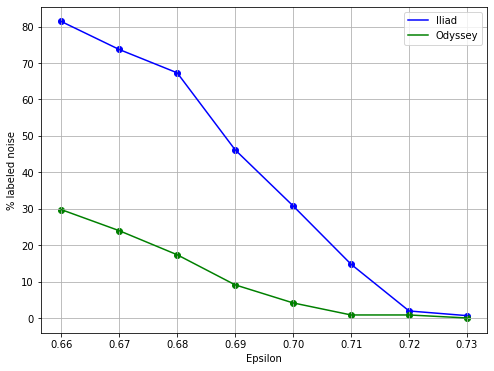

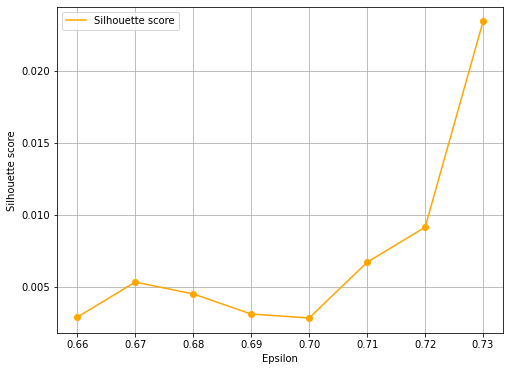

In [766]:
plt.figure(figsize=(8, 6))

# Plot y_1 with scatter and line
plt.scatter(f, ni, color='blue', marker='o')
plt.plot(f, ni, color='blue', linestyle='-', label='Iliad')

# Plot y_2 with scatter and line
plt.scatter(f, no, color='green', marker='o')
plt.plot(f, no, color='green', linestyle='-', label='Odyssey')

# Add labels, legend, and grid
plt.xlabel('Epsilon')
plt.ylabel('% labeled noise')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


plt.figure(figsize=(8, 6))

# Plot y_1 with scatter and line
plt.scatter(f, sh, color='orange', marker='o')
plt.plot(f, sh, color='orange', linestyle='-', label='Silhouette score')

# Add labels, legend, and grid
plt.xlabel('Epsilon')
plt.ylabel('Silhouette score')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

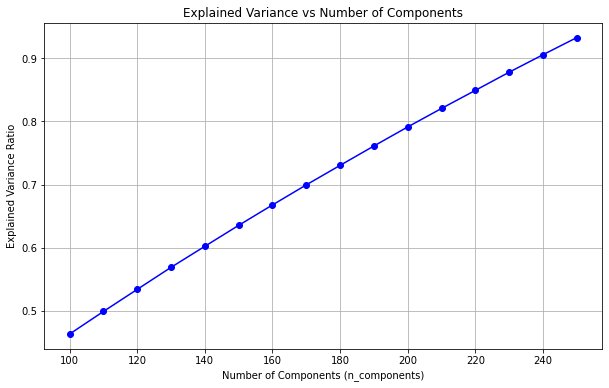

In [690]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline

# Assuming get_top_trigrams is already defined and chunks is available


# Initialize the range for n_components
n_components_range = range(100, 251, 10)  # 2 <= n_components <= 250
explained_variance_list = []

# Loop through the range and compute explained variance
for n in n_components_range:
    X, feature_names = get_top_trigrams(chunks)
    lsa = make_pipeline(TruncatedSVD(n_components=n), Normalizer(copy=False))
    X_lsa = lsa.fit_transform(X)
    explained_variance = lsa[0].explained_variance_ratio_.sum()
    explained_variance_list.append(explained_variance)

# Plot the explained variance against n_components
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, explained_variance_list, marker='o', linestyle='-', color='b')
plt.title('Explained Variance vs Number of Components')
plt.xlabel('Number of Components (n_components)')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()
